In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf 
import datetime

https://wid.world/data/

In [2]:
assets_prices_df = yf.download(["^GSPC"], 
                               auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
assets_prices_df['Close'].head()

Date
1927-12-30    17.660000
1928-01-03    17.760000
1928-01-04    17.719999
1928-01-05    17.549999
1928-01-06    17.660000
Name: Close, dtype: float64

In [4]:
presidential_data = pd.read_csv("presidential.csv")

In [5]:
presidential_data

,name,start,end,party
0,Eisenhower,1953-01-20,1961-01-20,Republican
1,Kennedy,1961-01-20,1963-11-22,Democratic
2,Johnson,1963-11-22,1969-01-20,Democratic
3,Nixon,1969-01-20,1974-08-09,Republican
4,Ford,1974-08-09,1977-01-20,Republican
5,Carter,1977-01-20,1981-01-20,Democratic
6,Reagan I,1981-01-20,1985-01-20,Republican
7,Reagan II,1985-01-20,1989-01-20,Republican
8,Bush - Father,1989-01-20,1993-01-20,Republican
9,Clinton I,1993-01-20,1997-01-20,Democratic


In [6]:
close_prices = assets_prices_df['Close']

In [7]:
presidential_data['end'] = pd.to_datetime(presidential_data['end'])
presidential_data['start'] = pd.to_datetime(presidential_data['start'])

In [8]:
def get_next_work_day(df, day):
    while day not in df:
        day += datetime.timedelta(days=1)
    return day

In [9]:
gains_list = list()
for index, row in presidential_data.iterrows():
    end = get_next_work_day(close_prices, row['end'])
    begin = get_next_work_day(close_prices, row['start'])
    
    gain = (close_prices[end] - close_prices[begin]) / close_prices[begin]
    gains_list.append(gain * 100)


In [10]:
presidential_data['stocks_result'] = gains_list

In [11]:
import seaborn as sns

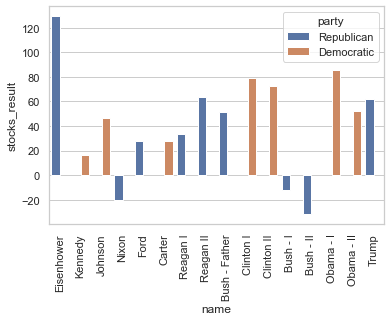

In [12]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="name", y="stocks_result", hue="party", data=presidential_data)
plt.setp(ax.get_xticklabels(), rotation=90)
ax;

In [13]:
presidential_data["legislation_time_day"] = (presidential_data["end"] - presidential_data["start"]).astype('timedelta64[D]')

In [14]:
presidential_data_grouped = presidential_data.groupby(['party']).agg({"stocks_result":"sum", "legislation_time_day": "sum"}).reset_index()
presidential_data_grouped["legislation_time_year"] = presidential_data_grouped["legislation_time_day"] / 365.25
presidential_data_grouped["stocks_result"] / presidential_data_grouped["legislation_time_year"]

0    13.560343
1     7.567425
dtype: float64

In [15]:
presidential_data_grouped

,party,stocks_result,legislation_time_day,legislation_time_year
0,Democratic,379.689618,10227.0,28.000000
1,Republican,301.681797,14561.0,39.865845


In [16]:
def add_annotation(ax, name, data, date, i=0):
    ax.annotate(name,
                xy=(mdates.date2num(date), data["Close"][date]), xycoords='data',
                xytext=(i/30 + 0.4, i/30 + 0.45), textcoords='axes fraction',
                arrowprops=dict(facecolor='black', shrink=0.05),
                horizontalalignment='right', verticalalignment='top')

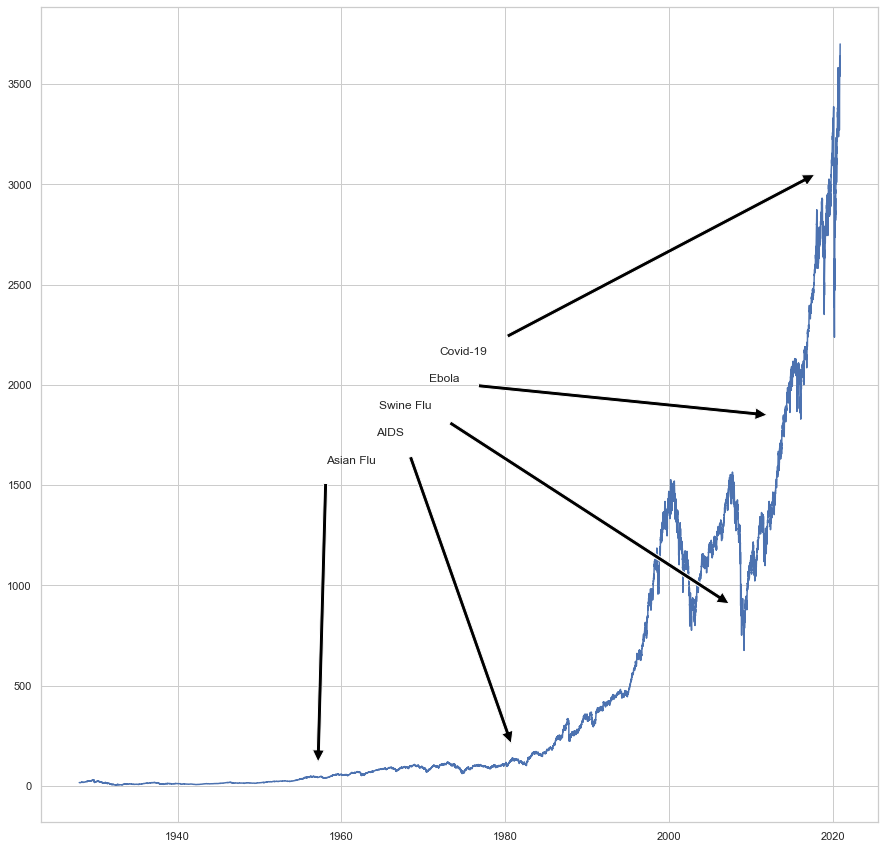

In [17]:
import matplotlib.dates as mdates

# Create our figure and data we'll use for plotting
fig, ax = plt.subplots(figsize=(15, 15))

# Plot a line and add some simple annotations
line, = ax.plot(assets_prices_df.index, assets_prices_df["Close"])

asian_flu_date = datetime.datetime(1957, 2, 11)
asian_flu = "Asian Flu"
aids_date = datetime.datetime(1981, 6, 10)
aids = "AIDS"
swine_flu_date = datetime.datetime(2009, 4, 13)
swine_flu = "Swine Flu"
ebola_date = datetime.datetime(2013, 12, 26)
ebola = "Ebola"
covid_date = datetime.datetime(2019, 12, 3)
covid = "Covid-19"
pandemic_dates = [asian_flu_date, aids_date, 
                  swine_flu_date, ebola_date, covid_date]
pandemic_names = [asian_flu, aids, swine_flu, ebola, covid]

for i, name in enumerate(pandemic_names):
    add_annotation(ax, name, assets_prices_df, pandemic_dates[i], i)

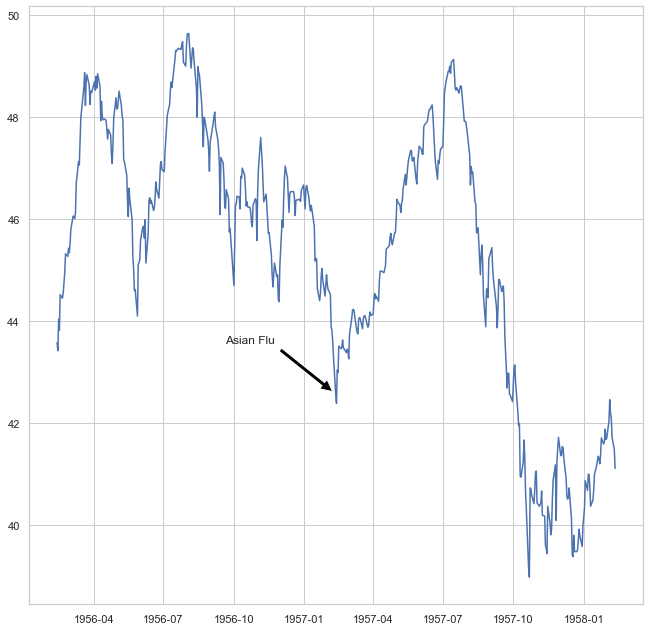

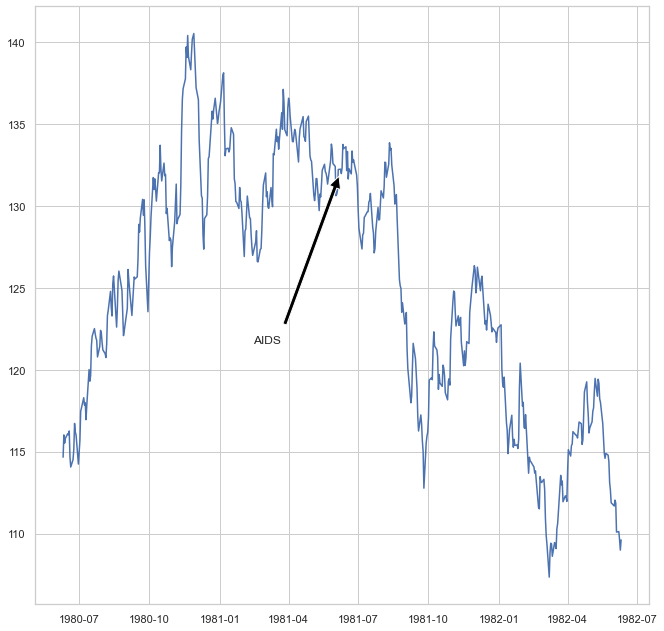

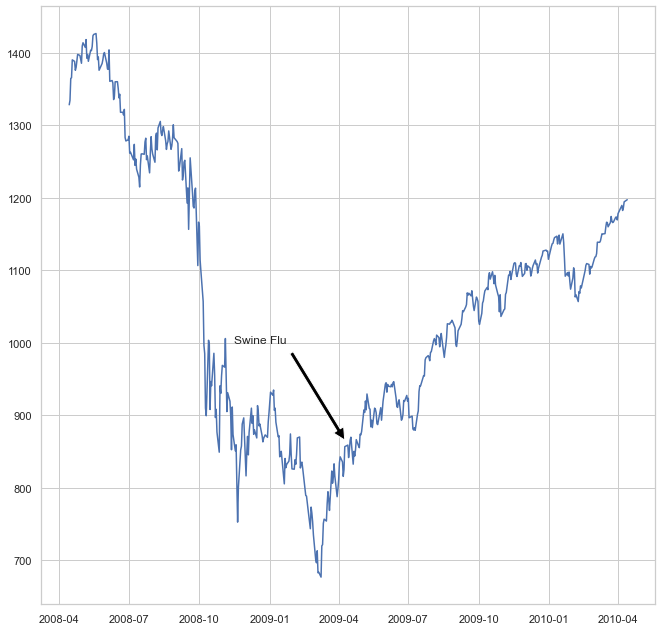

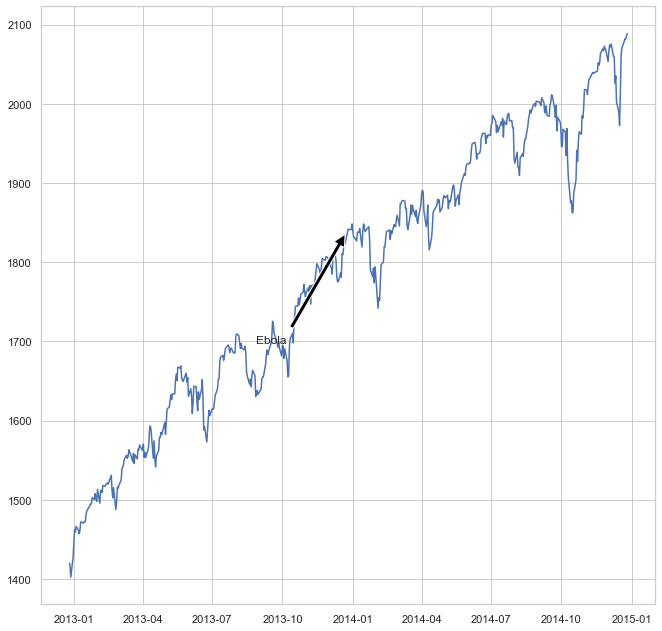

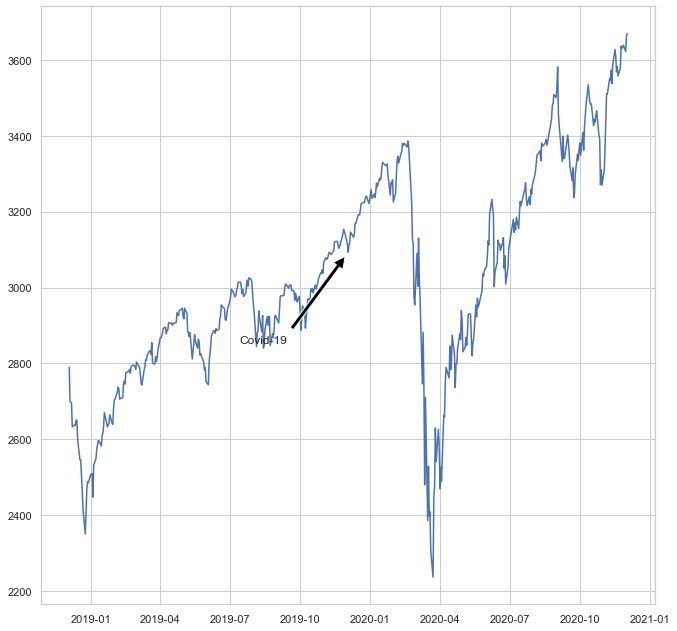

In [18]:

pandemic_dates = [asian_flu_date, aids_date, 
                  swine_flu_date, ebola_date, covid_date]
pandemic_names = [asian_flu, aids, swine_flu, ebola, covid]

for i, date in enumerate(pandemic_dates):
    # Create our figure and data we'll use for plotting
    fig, ax = plt.subplots(figsize=(11, 11))

    # Plot a line and add some simple annotations
    # Adicionar programaticamente 1 ano pre pandemia e 1 ano pós pandemia

    assets_prices_df_pandemic= assets_prices_df[(date - datetime.timedelta(days=365)):(date + datetime.timedelta(days=365))]
    line, = ax.plot(assets_prices_df_pandemic.index, assets_prices_df_pandemic["Close"])
    add_annotation(ax, pandemic_names[i], assets_prices_df_pandemic, date)

In [19]:
assets_prices_df.describe()

,Open,High,Low,Close,Volume
count,23344.000000,23344.000000,23344.000000,23344.000000,2.334400e+04
mean,489.616687,492.501497,486.545670,489.717134,7.729973e+08
std,731.814606,735.774982,727.503066,731.920326,1.490113e+09
min,4.400000,4.400000,4.400000,4.400000,0.000000e+00
25%,23.860001,23.860001,23.860001,23.860001,1.290000e+06
50%,99.580002,100.349998,98.779999,99.580002,1.740500e+07
75%,838.597504,849.332504,827.264984,838.847488,5.442775e+08
max,3670.939941,3699.199951,3670.939941,3699.129883,1.145623e+10


In [20]:
!pip install sklearn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
cols = assets_prices_df.columns.tolist()

In [23]:
assets_prices_df[cols] = scaler.fit_transform(assets_prices_df[cols])

In [24]:
assets_prices_df.describe()

,Open,High,Low,Close,Volume
count,23344.000000,23344.000000,23344.000000,23344.000000,23344.000000
mean,0.132336,0.132105,0.131499,0.131354,0.067474
std,0.199593,0.199138,0.198417,0.198098,0.130070
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.005307,0.005267,0.005307,0.005267,0.000113
50%,0.025959,0.025969,0.025741,0.025761,0.001519
75%,0.227516,0.228682,0.224425,0.225848,0.047509
max,1.000000,1.000000,1.000000,1.000000,1.000000


https://towardsdatascience.com/predicting-stock-price-with-lstm-13af86a74944

In [27]:
close_prices = assets_prices_df['Close'].values.reshape(assets_prices_df.shape[0],1)
close_prices[:5]

array([[0.0035889 ],
       [0.00361596],
       [0.00360513],
       [0.00355912],
       [0.0035889 ]])

In [38]:
look_back = 90
forward_days = 20
num_periods = 300

In [39]:
#split in Train and Test

division = len(array) - num_periods*forward_days

array_test = array[division-look_back:]
array_train = array[:division]

In [40]:
len(array_test)

6090

In [41]:
#Get the data and splits in input X and output Y, by spliting in `n` past days as input X 
#and `m` coming days as Y.
def processData(data, look_back, forward_days,jump=1):
    X,Y = [],[]
    for i in range(0,len(data) -look_back -forward_days +1, jump):
        X.append(data[i:(i+look_back)])
        Y.append(data[(i+look_back):(i+look_back+forward_days)])
    return np.array(X),np.array(Y)

In [42]:
X_test,y_test = processData(array_test,look_back,forward_days,forward_days)
y_test = np.array([list(a.ravel()) for a in y_test])

X,y = processData(array_train,look_back,forward_days)
y = np.array([list(a.ravel()) for a in y])

from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size=0.20, random_state=42)

In [43]:
print(X_train.shape)
print(X_validate.shape)
print(X_test.shape)
print(y_train.shape)
print(y_validate.shape)
print(y_test.shape)

(13788, 90, 1)
(3447, 90, 1)
(300, 90, 1)
(13788, 20)
(3447, 20)
(300, 20)


In [45]:
from keras.models import Sequential
from keras.layers import LSTM,Dense

NUM_NEURONS_FirstLayer = 50
NUM_NEURONS_SecondLayer = 30
EPOCHS = 50

#Build the model
model = Sequential()
model.add(LSTM(NUM_NEURONS_FirstLayer,input_shape=(look_back,1), return_sequences=True))
model.add(LSTM(NUM_NEURONS_SecondLayer,input_shape=(NUM_NEURONS_FirstLayer,1)))
model.add(Dense(forward_days))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_validate,y_validate),shuffle=True,batch_size=2, verbose=2)

ModuleNotFoundError: No module named 'keras'

In [46]:
plt.figure(figsize = (15,10))

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='best')
plt.show()

NameError: name 'history' is not defined

In [47]:
Xt = model.predict(X_test)


NameError: name 'model' is not defined

In [48]:
plt.figure(figsize = (15,10))

for i in range(0,len(Xt)):
    plt.plot([x + i*forward_days for x in range(len(Xt[i]))], scl.inverse_transform(Xt[i].reshape(-1,1)), color='r')
    
plt.plot(0, scl.inverse_transform(Xt[i].reshape(-1,1))[0], color='r', label='Prediction') #only to place the label
    
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label='Target')
plt.legend(loc='best')
plt.show()

NameError: name 'Xt' is not defined